# This notebook is intended to generate color images by stacking multi-band images

let's start using the magic function we learned last time "%pylab inline"
<br> then we can import the packeages we will use today: sep, astropy  
<br> from astropy we will import: fits and wcs

In [1]:
%pylab inline
from astropy.io import fits
from astropy import wcs as wcs
import sep

Populating the interactive namespace from numpy and matplotlib


# read an image
B-median.fits is our test image. we will use fits.open to open and put the image in a variable img
<br> let's see the image format. Fits mean "Flexible Image Transport System" 
<br> this is a specific format composed by a metadata part and a data part.
The metadata (header) include all the info about the image and the data part is usually a bidimensional array. A fits image can have multiple layers of metadata and data.
<br> For example:<br>
<br> header, data  (level[0])
<br> header, data  (level[1])
<br> header, data  (level[2])
<br> You can see how many layers your image has using the function len()

In [2]:
#img = fits.open('B-median.fits')
img = fits.open('16335757.fits')
len(img)

1

Since the size is one, let's take a look at the layer zero

In [3]:
header = img[0].header
print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 1024 / length of data axis 1                          NAXIS2  =                 1024 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE-OBS= '2016-04-30T01:18:07' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =   60.000000000000000 /Exposure time in seconds                        EXPOSURE=   60.000000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -20.170235250000001 /CCD temp

Now let see the data

In [4]:
X = img[0].data
print(X)

[[227.64964 242.42308 254.67735 ... 260.97653 234.49554 257.19666]
 [222.01602 265.02048 248.61688 ... 249.39539 249.02998 263.34747]
 [242.40106 235.84102 219.14624 ... 260.77954 227.6311  245.4189 ]
 ...
 [258.41376 235.47336 252.11043 ... 254.78888 252.02977 224.48628]
 [253.63196 250.44969 258.99002 ... 264.21622 246.82892 265.422  ]
 [243.02887 276.27774 218.37288 ... 207.54837 259.7037  248.36153]]


The data is an array, so we can actually use matplotlib to "imshow" the image

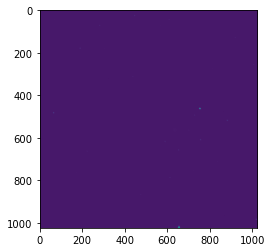

In [5]:
plt.imshow(X)

what is going on here? we do not see anything. Probably becasue there are some pixel in the array that have very low or very high counts.
So we can do an histogram and see the distribution of the points in the array 

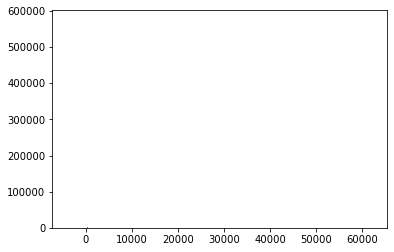

In [6]:
image_hist = plt.hist(X.flatten(), bins=1000)

let do it again constraining the range of the histogram using range=(X,Y)

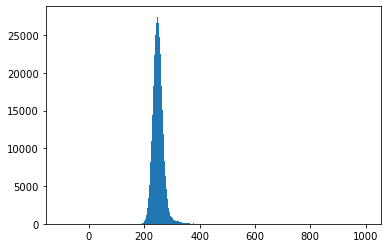

In [7]:
image_hist = plt.hist(X.flatten(), bins=1000,range=(-100,1000))

let's now do the plot again using some limits. what do yo think we should use?  vmin=-XX, vmax=YY)

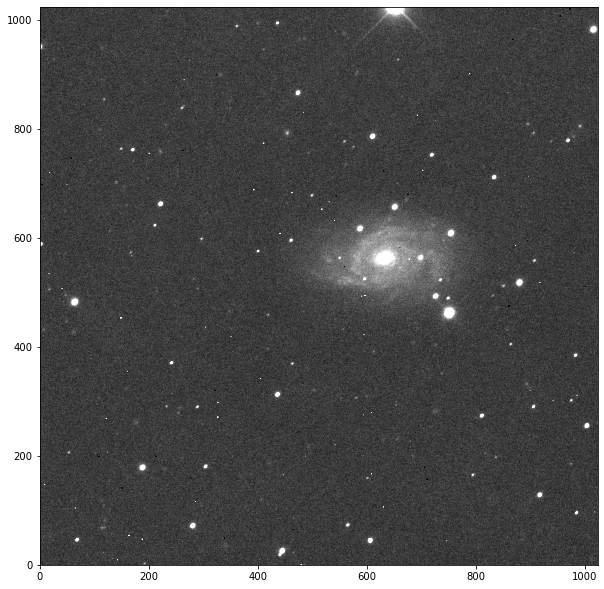

In [8]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(X, origin='lower', cmap='gray', vmin=200, vmax=400)

Now we would like to be able to find the position of all stars in the image. But in order to do that with the package sep, we need to define the background of the image. Sep has a command for that: sep.Background(X). 
But before doing that there is a command to run: X = X.byteswap().newbyteorder(

In [9]:
X = img[0].data
X = X.byteswap().newbyteorder()
bkg = sep.Background(X)

Now we can exstract all the objects from the image using the sep commmand sep.extract
and then we can plot all the star detected on our image.  thresh=3.0 define how many star we want to find larger numbers means we find less objects. This is similar to a dictionary with each column that can be identify by a name. 

In [10]:
objects = sep.extract(X, thresh=20.0, err=bkg.globalrms, mask=None, minarea=10, clean=True, clean_param=1.0, segmentation_map=False)
print(len(objects))
print(type(objects))
objects.dtype.names

52
<class 'numpy.ndarray'>


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# dictionary

objects is a NumPy structured array with many fields.

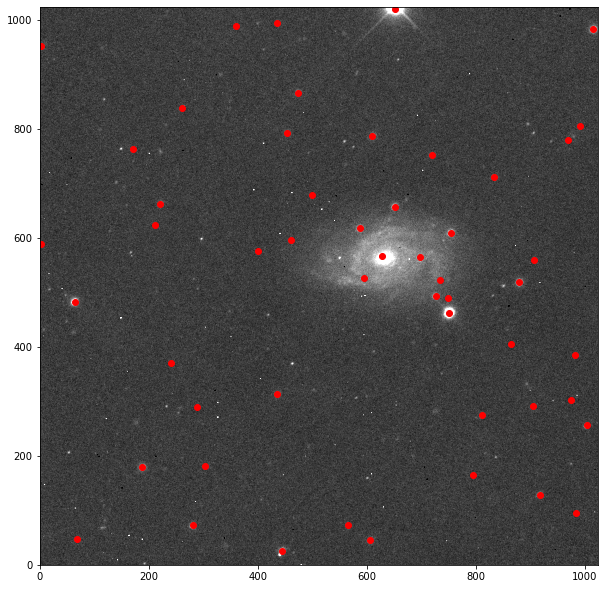

In [11]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(X, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(objects['x'],objects['y'],'or')

Finally, we’ll perform simple circular aperture photometry with a 3 pixel radius at the locations of the objects:

In [12]:
flux, fluxerr, flag = sep.sum_circle(X, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
print(flux,fluxerr)
print(objects['x'], objects['y'])

[  83943.18568115   17652.29281616   44739.25286499   14552.46019897
   59898.86915771   12973.35488403   41382.74689575    9590.01567017
   93653.58506836   17819.38764404   43562.89538818   21415.51717651
   10489.75962646   13960.36858398    9687.63220825   43220.05750244
   14377.85153564   14552.23866943    9311.80194946  835227.8687793
  183511.44546875   11805.48873657   62388.08750732  121903.43446777
   11494.67632202   12947.1069458     9948.8168042    33759.61828003
   10004.2982959    15568.71510742   13691.74172119   17854.59549927
  111917.51090332   74387.99922607   10524.41638184   86473.7200708
   40901.91702271    9424.6500769    26886.42095947   20572.26149536
   15825.50859863   16806.35436646   60005.47157104    9385.20269897
    8907.43781616    9219.71573608   36405.22009399   27064.57536377
  138222.59338867    9207.95181946   12350.69943359 1009302.32367432] [ 301.74354228  157.44353853  227.71758303  147.27061896  258.91126698
  141.66604881  220.15584542  129

What we have just measured is the counts within a radius of 3 pixel for each object we selected in the image. How we use this measurments in astronomy? we usually convert this measurment in magnitude and if we know how our telescope is performing, we know how bright a star appear to be. How bright actually is depends on how far the star is. 

if we know that our Supernova is at coordinate RA= 9:53:08.08 DEC = 16:42:50.250 how we know how much flux is emitting? First we need to know which is our object on the image. To do that we can use the information on the header of the file and convert the coordinate in pixel position. To do that we will use the wcs package in astropy.


In [13]:
#read the header
header = img[0].header
# import the wcs package
from astropy.wcs import WCS
# take information from the header about the coordinate where the image is pointing to.
w = WCS(header)
#transform coordinate in pixels:
Ra = 148.283666667
Dec = 16.7139583333
px, py = w.wcs_world2pix(Ra,Dec, 1)
print(px,py)

611.6228472316652 786.023106657171


Now we want to know how much flux of the Supernova was detected by our detector. How we do that? We cn make a loop on the objects we found on the image and find the closer to this pixels. let's do this in steps:

In [14]:
#let's loop over the stars 
# we will use for and "enumerate"
for i,j in enumerate(objects['x']):
    print(objects['x'][i],objects['y'][i])

444.23769202628586 25.627800496614693
67.7338378276479 45.94703378600119
605.6248728506777 44.53884771922165
564.535792700472 73.16151329111406
280.0537660738645 71.7386877535555
984.3803196631952 95.43452997978416
916.8240527195229 128.41861054552638
793.9276200652265 164.87834418698264
187.88912811716298 178.63500091094787
303.5481260074333 180.63237256596858
1003.2145104587855 255.33507002879918
810.4105013945323 273.6086295014369
288.49178716786156 289.97325246843513
905.4106068324969 290.3182995877771
974.4200469894565 301.62117747534745
435.55323120271777 312.6322809959689
241.18254330663018 370.6551872204759
982.4783139833193 384.5818764855295
863.4916324354894 404.9987718494879
750.777405433245 462.18292082617273
63.42823032667765 482.2573196521705
748.5832426407648 489.4464565910816
725.8887091028982 493.07251020108356
879.5054501377489 517.8480739717493
734.4746837875128 522.9160967131473
595.1660801286199 525.1197098930635
906.8655598238239 558.1752250062441
697.490961284692

In [15]:
#let's loop over the stars 
# we will use for and "enumerate"
# let's now make the difference between each pixel of an object and px py
for i,j in enumerate(objects['x']):
    print((objects['x'][i]-px)**2+(objects['y'][i]-py)**2,i,j)
    if (objects['x'][i]-px)**2+(objects['y'][i]-py)**2 < 10:
       print((objects['x'][i]-px)**2+(objects['y'][i]-py)**2,i,j)

606218.811814135 0 444.23769202628586
843527.8481868962 1 67.7338378276479
549834.8819494349 2 605.6248728506777
510388.84200081707 3 564.535792700472
620140.2866683039 4 280.0537660738645
615860.7154908418 5 984.3803196631952
525591.4491374915 6 916.8240527195229
419055.846142043 7 793.9276200652265
548470.5757165931 8 187.88912811716298
461407.9747808731 9 303.5481260074333
434973.82292945846 10 1003.2145104587855
302085.12784636 11 810.4105013945323
350479.13981862355 12 288.49178716786156
332034.50344298105 13 905.4106068324969
366267.0371471671 14 974.4200469894565
255099.38350877556 15 435.55323120271777
309756.5272692411 16 241.18254330663018
298688.838501308 17 982.4783139833193
208617.4286756874 18 863.4916324354894
124236.45702733232 19 750.777405433245
392790.9913583734 20 63.42823032667765
106715.85927504052 21 748.5832426407648
98876.73915315307 22 725.8887091028982
143678.9370955655 23 879.5054501377489
84317.87242682924 24 734.4746837875128
68341.40762653315 25 595.16608

What do you see? is there one object['x'] element that is very close in pixel to px? and the same for  object['y'] and py?

In [16]:
#let's loop over the stars 
# we will use for and "enumerate"
# let's now make the difference between each pixel of an object and px py
# let add an iff statment in the loop to select only the element we want 
for i,j in enumerate(objects['x']):
    if (objects['x'][i]-px)**2+(objects['y'][i]-py)**2 < 10:
       print(((objects['x'][i]-px)**2+(objects['y'][i]-py)**2),i,j)

2.5062856301367797 42 610.0990721706914
